In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# K_means

先导入数据吧

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

可视化的效果大概是这样，为了方便可视化，这里只取前两个特征

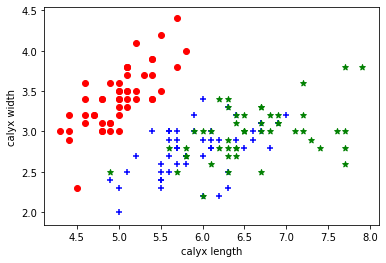

In [3]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c="red", marker='o')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c="blue", marker='+')
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], c="green", marker='*')
plt.xlabel('calyx length')
plt.ylabel('calyx width') 
plt.show()

## 我的K_means

In [4]:
from K_means import KMeansCluster
from sklearn import metrics

### 当类的个数为3：

In [5]:
# 实例化，训练，提取标签
KM1 = KMeansCluster(n_clusters=3)
KM1.fit(X)
label_pred = KM1.labels

In [6]:
x0 = X[label_pred == 0.]
x1 = X[label_pred == 1.]
x2 = X[label_pred == 2.]

其实有时候会出现事实上只分了两类的情况，有点毒

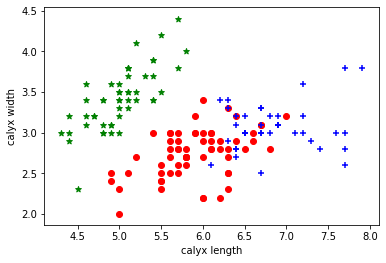

In [7]:
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o')
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*')
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+')
plt.xlabel('calyx length')
plt.ylabel('calyx width')
plt.show()

可以看到是有一些点的分布方式是有问题的，下面看一下sse

In [8]:
KM1.sse

810.6873856281868

发现真实情况里不用sse来作为评估指标的，用的是Calinski-Harabaz Index，分数越大越好

In [9]:
metrics.calinski_harabasz_score(X, label_pred)

561.62775662962

### 当类的个数为2时：

In [10]:
# 实例化，训练，提取标签
KM2 = KMeansCluster(n_clusters=2)
KM2.fit(X)
label_pred = KM2.labels

In [11]:
x0 = X[label_pred == 0.]
x1 = X[label_pred == 1.]

因为划定的类的个数变了，所以可视化的时候发生了一些形变

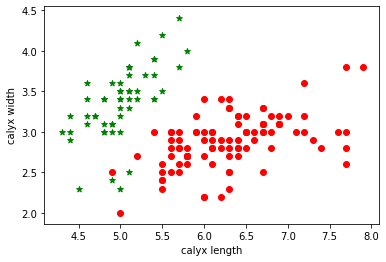

In [12]:
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o')
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*')
plt.xlabel('calyx length')
plt.ylabel('calyx width') 
plt.show()

一般来说，KM2的sse会大于KM1

In [13]:
KM2.sse

784.6667296371888

## sklearn的K_means

In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=3)
model.fit(X)
Label_pred = model.labels_

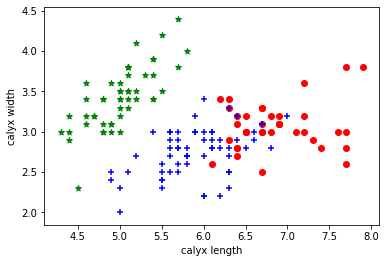

In [16]:
x0 = X[Label_pred == 0]
x1 = X[Label_pred == 1]
x2 = X[Label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')  
plt.xlabel('calyx length')
plt.ylabel('calyx width') 
plt.show()  

好像多次运行的效果，当n=3时两者的Calinski-Harabaz Index差不多，几乎是一样的，几次运行的结果其实K_means的平均水平比我的要高一点

In [17]:
from sklearn import metrics
metrics.calinski_harabasz_score(X, Label_pred)

561.62775662962

# KNN

## 我的KNN

In [18]:
from K_NearestNeighbor import KNNClassifier
from Data_preprocessing import train_test_split

将iris切分成训练集和验证集，默认8:2分吧我记得，因为是iris所以不归一化问题也不是很大

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
knn_clf = KNNClassifier(k=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)

这里就用准确率意思意思得了

In [21]:
accuracy_score = knn_clf.score(X_test, y_test)
print('The accuracy_score is {:.3}'.format(accuracy_score))

The accuracy_score is 1.0


## sklearn的KNN

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_clf1 = KNeighborsClassifier(n_neighbors=3)
knn_clf1.fit(X_train,y_train)
y_predict = knn_clf1.predict(X_test)

我的knn的准确率比sklearn的KNN要高一点，原因可能是我的KNN是有距离加权的优化的

In [23]:
knn_clf1.score(X_test,y_test)

0.9666666666666667

寻找一下k应该取什么值才能让准确率达到最大

In [24]:
best_score = 0.0
besk_k = -1

for k in range(1,11):
    knn_clf1 = KNeighborsClassifier(n_neighbors=k)
    knn_clf1.fit(X_train,y_train)
    score = knn_clf1.score(X_test,y_test)
    if score > best_score:
        best_k = k
        best_score = score
print("best_k = ",best_k)
print("best_score =", best_score)

best_k =  3
best_score = 0.9666666666666667


# 线性回归

## 还是先看看我的线性回归

先加载数据吧

In [25]:
boston = datasets.load_boston()

### 简单线性回归

In [26]:
# 因为是简单线性回归，所以就先取一个特征
X = boston.data[:,5]
y = boston.target

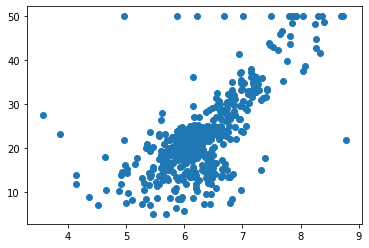

In [27]:
plt.scatter(X,y)
plt.show()

把那些冗余的点去掉

In [28]:
X = X[y < np.max(y)]
y = y[y < np.max(y)]

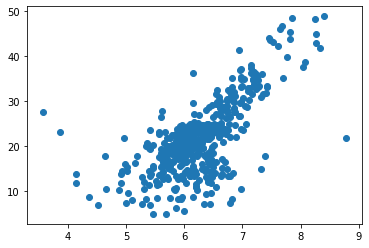

In [29]:
plt.scatter(X,y)
plt.show()

In [30]:
X_train, x_test, y_train, y_test = train_test_split(X, y, seed = 1)

In [31]:
from Linear_Regression import SimpleLinearRegression

SimpleReg = SimpleLinearRegression()
SimpleReg.fit(X_train, y_train)

SimpleLinearRegression()

看看最终效果

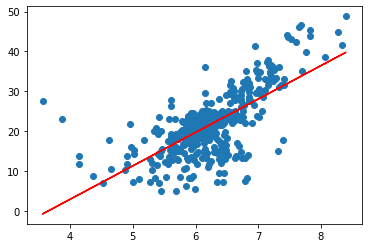

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train, SimpleReg.predict(X_train), color="r")
plt.show()

In [33]:
SimpleReg.score(x_test, y_test)

-0.09570133968114702

### 多元线性回归

In [34]:
X = boston.data
y = boston.target

X = X[y < np.max(y)]
y = y[y < np.max(y)]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 1)

In [36]:
from Linear_Regression import LinearRegression

# 因为是用正规化方程法来训练数据集的，所以也不用归一化
MulReg = LinearRegression()
MulReg.fit_normal(X_train, y_train)

LinearRegression()

最终效果很明显就比简单线性回归要好

In [37]:
MulReg.score(X_test, y_test)

0.7319634288684673

## 看看sklearn的线性回归

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

最终效果是一样的，但是sklearn的fit()方法用的是梯度下降，我用的是正规化方程。

In [39]:
lin_reg.score(X_test, y_test)

0.7319634288684287

# 决策树

## 加载数据

In [40]:
lenses = np.loadtxt('..\data\lense\lenses.txt',dtype='int')

形状是对的，进一步的切分一下

In [41]:
lenses.shape

(24, 6)

机器学习实战里的决策树是要求在输入dataSet的时候,最后一列是保留标签的,同时要求输入的数据是列表

In [42]:
X = lenses[:,1:]
y = lenses[:,-1]

array转化为list的方式有两种，一种是list()，一种是tolist(),两者在一维上没什么区别，二维上效果是不一样的。这里只能用二维

In [43]:
X_list = X.tolist()
y_list = y.tolist()

## 我的决策树

In [44]:
from Decision_tree import Decisiontree
from Decision_tree import classify

In [45]:
tree = Decisiontree()
mytree = tree.fit(X_list, y_list)
featLabels = tree.featLabels

我截了一个[1, 1, 1, 1，3]做测试数据，也就是lenses的第一个样本，如果理想的话它应该输出3,对应到的是不建议佩戴隐形眼镜

In [46]:
testVec = [1, 1, 1, 1]  # 测试数据
result = classify(mytree, featLabels, testVec)

In [47]:
if result == 1:
    print('no lense')
if result == 2:
    print('soft')
if result == 3:
    print('hard')

hard


## sklearn的决策树

In [48]:
from sklearn import tree

In [49]:
clf = tree.DecisionTreeClassifier(max_depth = 4)

佛了，我发现我的决策树会把y给修改，删掉一些标签，现在还得再重新准备一下,而且sklearn的决策树跟机器学习实战的不同，它的X是不包含标签的，也就是在切片的时候也还得微调一下

In [50]:
X = lenses[:,1:5]
y = lenses[:,-1]
X_list = X.tolist()
y_list = y.tolist()

In [51]:
clf = clf.fit(X_list, y_list) 

照样还是截[1, 1, 1, 1，3]做测试数据，能看到输出的是对的

In [52]:
print(clf.predict([[1,1,1,1]])) 

[3]


# 逻辑回归

有点难，adult数据集的下载预处理什么的自己来的话就手忙脚乱的了。我先用digits吧

In [53]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 手动把数据集调得不平衡一些
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## 我的逻辑回归

In [55]:
from Logistic_Regression import LogisticRegression
import Evaluating

乍一看准确率好像挺高的

In [56]:
log_reg1 = LogisticRegression()
log_reg1.fit(X_train,y_train)
log_reg1.score(X_test,y_test)

0.9777158774373259

In [57]:
y_predict = log_reg1.predict(X_test)

但是这种时候其他指标往往更能反应问题

In [58]:
Evaluating.confusion_matrix(y_test,y_predict)

array([[306,   5],
       [  3,  45]])

In [59]:
Evaluating.precision_score(y_test, y_predict)

0.9

In [60]:
Evaluating.recall_score(y_test,y_predict)

0.9375

In [61]:
Evaluating.F1_score(y_test,y_predict)

0.9183673469387755

### PR曲线

In [62]:
decision_scores = log_reg1.decision_fuction(X_test)

In [63]:
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores),0.1)
precisions = []
recalls = []
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(Evaluating.precision_score(y_test,y_predict))
    recalls.append(Evaluating.recall_score(y_test,y_predict))

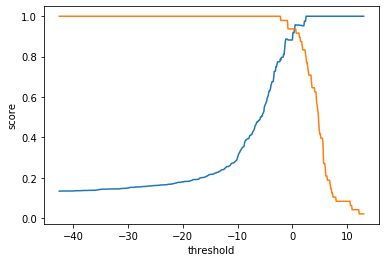

In [64]:
plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)
plt.xlabel('threshold')
plt.ylabel('score')
plt.show()

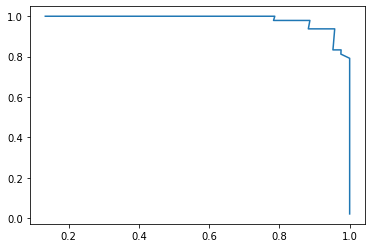

In [65]:
plt.plot(precisions,recalls)
plt.show()

## sklearn的逻辑回归

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [67]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_predict = log_reg.predict(X_test) 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


emmm,比我的还低一点，可能是随机化设定的问题

In [68]:
from sklearn.metrics import f1_score

f1_score(y_test,y_predict)

0.8913043478260869

# BP 神经网络，额这个可能放在Pycharm上更加合适

# SVM

为了方便可视化，只处理二分类，同时只取前两个特征

In [69]:
from Evaluating import plot_decision_boundary
X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

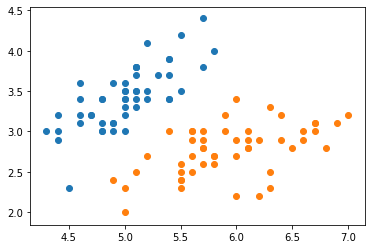

In [70]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

## 我的SVM

In [84]:
from Support_vector_Machines import SVM

svm = SVM(X_standard,y,C=1)
svm.train()

emmm,有点难受,多次运行的结果是不一样的。而且不稳定，有时候还成，有时候不成，反正我把成功的截图了，劳资成功过

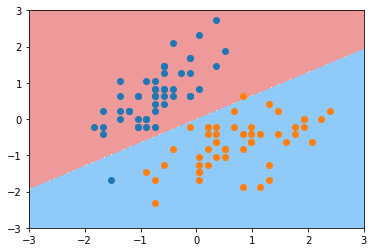

In [85]:
plot_decision_boundary(svm, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

## sklearn的SVM

In [74]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)
svc.coef_

array([[ 4.03239654, -2.50699868]])

C:\Users\User\Documents\大学\QG中期考核\code\Evaluating.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


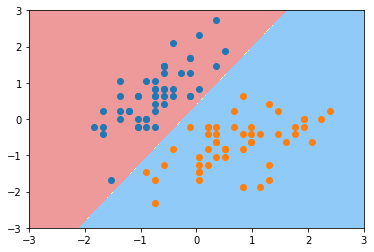

In [75]:
plot_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()

我调整了一下C，最终的边界效果明显就舒适了一些

In [76]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

C:\Users\User\Documents\大学\QG中期考核\code\Evaluating.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


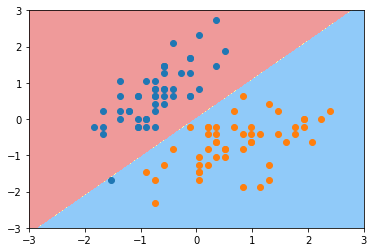

In [77]:
plot_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1])
plt.scatter(X_standard[y==1,0],X_standard[y==1,1])
plt.show()